In [ ]:
import numpy as np
import pandas as pd

: 

In [2]:
df = pd.read_excel("/Users/danilsherki/Downloads/Copy of математическая модель для форума-2.xlsx")

In [3]:
df

,снежный покров см,торф,взаимосвязь с водой,температура воздуха,ландшафт,результат
0,24.0,75,да,9.75,болото,0
1,56.0,179,нет,-8.21333,бугор пучения,2
2,65.0,23,нет,1.353333,торфяник,0
3,299.0,75,нет,-1.14833,торфяник,1
4,90.0,50,да,8.61,озеро,0
...,...,...,...,...,...,...
21004,311.0,76.75,да,-6.73,озеро,0
21005,29.0,179,нет,-6.32,лес,2
21006,175.0,49,нет,-0.52833,бугор пучения,1
21007,70.0,30,да,0,озеро,0


In [4]:
ohe_water = pd.get_dummies(df['взаимосвязь с водой'])
ohe_land = pd.get_dummies(df['ландшафт'])

In [5]:
df = pd.concat([df, ohe_water, ohe_land], axis=1)

In [6]:
df['взаимосвязь с водой'] = df['да']

In [7]:
df = df.drop(columns=['да', 'нет', 'ландшафт'])

In [8]:
df

,снежный покров см,торф,взаимосвязь с водой,температура воздуха,результат,болото,бугор пучения,лес,озеро,торфяник
0,24.0,75,1,9.75,0,1,0,0,0,0
1,56.0,179,0,-8.21333,2,0,1,0,0,0
2,65.0,23,0,1.353333,0,0,0,0,0,1
3,299.0,75,0,-1.14833,1,0,0,0,0,1
4,90.0,50,1,8.61,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
21004,311.0,76.75,1,-6.73,0,0,0,0,1,0
21005,29.0,179,0,-6.32,2,0,0,1,0,0
21006,175.0,49,0,-0.52833,1,0,1,0,0,0
21007,70.0,30,1,0,0,0,0,0,1,0


In [9]:
df['температура воздуха'] = [x if isinstance(x, float) else 0 for x in df['температура воздуха']]

In [10]:
df['торф'] = [x if isinstance(x, float) or  isinstance(x, int) else 0 for x in df['торф']]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21009 entries, 0 to 21008
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   снежный покров см    21009 non-null  float64
 1   торф                 21009 non-null  float64
 2   взаимосвязь с водой  21009 non-null  uint8  
 3   температура воздуха  21009 non-null  float64
 4   результат            21009 non-null  int64  
 5   болото               21009 non-null  uint8  
 6   бугор пучения        21009 non-null  uint8  
 7   лес                  21009 non-null  uint8  
 8   озеро                21009 non-null  uint8  
 9   торфяник             21009 non-null  uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 779.8 KB


In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [13]:
X = df.drop(columns=['результат'])
y = df['результат']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='multi:softmax',
    num_class=3
)

In [15]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [16]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.997144217039505


In [18]:
X_test


,снежный покров см,торф,взаимосвязь с водой,температура воздуха,болото,бугор пучения,лес,озеро,торфяник
12162,52.0,91.00,0,-6.20000,0,0,1,0,0
4148,263.0,50.00,1,6.88000,0,0,0,1,0
3263,98.8,51.00,0,-2.99333,0,1,0,0,0
10445,516.0,207.00,1,14.67000,0,0,0,1,0
5203,287.0,75.55,1,-6.49000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
20177,70.0,30.00,1,0.00000,0,0,0,1,0
11071,288.0,64.00,0,-1.09333,0,0,0,0,1
14462,261.0,0.00,1,-7.02000,1,0,0,0,0
6105,115.6,33.00,0,-3.41333,0,0,0,0,1


In [19]:
y_test, y_pred

(12162    2
 4148     0
 3263     1
 10445    0
 5203     1
         ..
 20177    0
 11071    1
 14462    1
 6105     1
 8849     2
 Name: результат, Length: 4202, dtype: int64,
 array([2, 0, 1, ..., 1, 1, 2], dtype=int32))

In [20]:
import joblib

joblib.dump(model, 'xgb.joblib')


['xgb.joblib']

In [21]:
model.feature_importances_

array([0.01083317, 0.10792997, 0.24486026, 0.22674261, 0.04490706,
       0.01858549, 0.0559604 , 0.28642195, 0.00375899], dtype=float32)

In [22]:
cols = list(X_train.columns)
sort = model.feature_importances_.argsort()

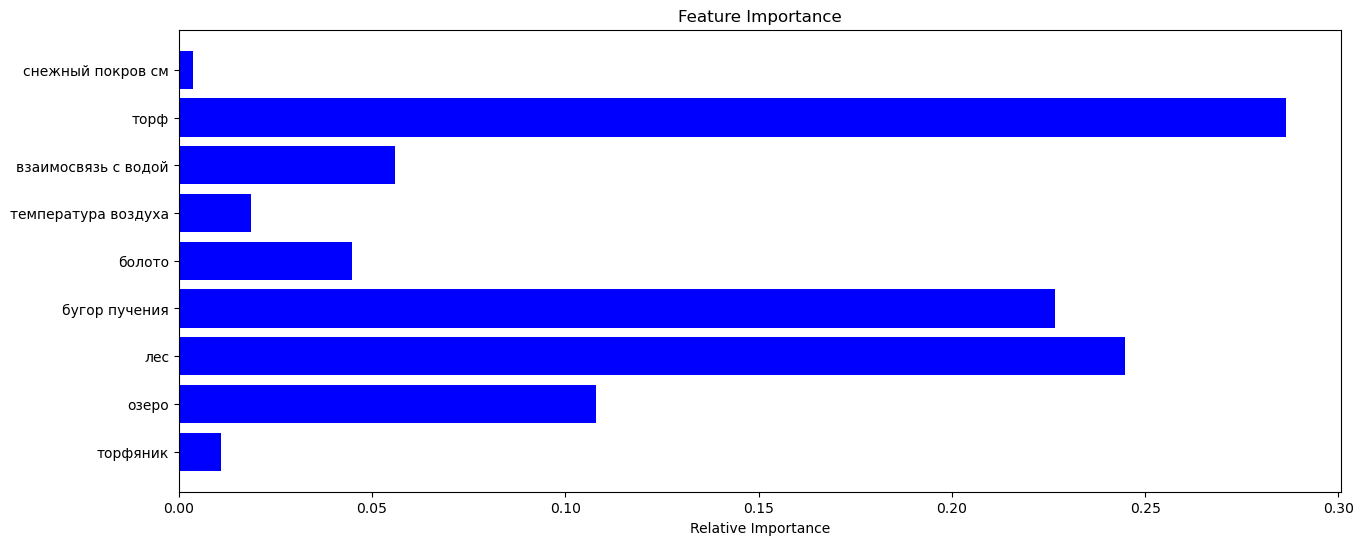

In [23]:
plt.figure(figsize=(15,6))
plt.barh(cols[::-1], model.feature_importances_, color = 'blue')
plt.title('Feature Importance')
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Copyright 2023 danilsherki
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
#     http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

